In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# QUES -

# Q1* take  movie_id,revenue and prediction_label columns from the prediction you did for  training data and convert into csv file(if u have split the train data remove it)
# Q2* read test data csv i have shared
# Q3* do data normalization for test data
# Q4* check for any missing columns in test data(compare with training data) and add missing columns with null values
# Q5* take  movie_id, prediction_label columns from the prediction you did for  test data and convert into csv file
# Q6* upload these two csv files to google drive before monday evening and to github - ipynb file

# Q3* do data normalization for test data *

In [5]:
# ANS - OF Q3

# IN BELOW PYTHON FILES
# tmdb(3rd_milestone_week_5)TASK_1_Test_data_Cleaning.ipynb
# tmdb(3rd_milestone_week_5)TASK_2_Test_data_1Hot_encoding.ipynb

In [6]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [7]:
import pandas as pd

In [8]:
# Steps:

# Import Libraries: Import necessary libraries including pandas, pycaret, matplotlib, and seaborn.
# Load Data: Load training and test datasets from CSV files.
# Handle Missing Columns: Identify columns in the training set that are not present in the test set and add them to the test set with None values.

# Setup PyCaret: Set up the PyCaret environment for regression, ignoring irrelevant features and handling missing values.

# Compare Models: Compare different models to find the best ones based on R2 score and print their names.

# Create and Tune Model: Create and tune the best model found.

# Plot Model Performance: Plot various metrics to evaluate the tuned model's performance.

# Finalize Model: Finalize the model for deployment.

# Evaluate Model: Evaluate the finalized model on the training set.

# Make Predictions: Make predictions on both training and test sets.

# Plot Predictions: Plot the budget vs. revenue for both actual and predicted values to assess the model's performance visually.

In [9]:
# train data csv file

In [10]:
file_path_train_data = '/content/drive/MyDrive/intern sy/infy_2024_ML/official/official submitted data sy/milestone 2/task3/tmdb_output(2nd milestone week 4)_csv_1Ht_encdg_169Cols_SY_Intern.csv'

# Load your dataset into a pandas DataFrame
df = pd.read_csv(file_path_train_data)

df.head(2)

df = df.rename(columns={'id': 'movie_id'})

In [11]:
df.tail(1)

,movie_id,budget,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,production_companies,...,Horror,Science Fiction,Family,Adventure,Documentary,Western,Mystery,War,Drama,Comedy
3972,882059,18000000,https://www.boykillsworldmovie.com,tt13923084,1,Boy Kills World,"When his family is murdered, a deaf-mute named...",934.001,/25JskXmchcYwj3jHRmcPm738MpB.jpg,"Vertigo Entertainment, Hammerstone Studios, Nt...",...,0,1,0,0,0,0,0,0,0,0


In [12]:
df.shape

(3973, 169)

In [13]:
df.columns

Index(['movie_id', 'budget', 'movie_url', 'imdb_id', 'original_language',
       'movie_title', 'overview', 'popularity', 'poster_path',
       'production_companies',
       ...
       'Horror', 'Science Fiction', 'Family', 'Adventure', 'Documentary',
       'Western', 'Mystery', 'War', 'Drama', 'Comedy'],
      dtype='object', length=169)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Columns: 169 entries, movie_id to Comedy
dtypes: float64(1), int64(157), object(11)
memory usage: 5.1+ MB


In [15]:
# ANS OF Q4

In [16]:
# # Convert columns to lists
# train_columns = df.columns.tolist()
# test_columns = df_test.columns.tolist()

# # Remove 'revenue' from train columns if present
# if 'revenue' in train_columns:
#     train_columns.remove('revenue')


# # train data missing cols
# # Find columns in test data that are not in train data
# missing_columns_in_train = [col for col in test_columns if col not in train_columns]

# missing_columns_in_train

In [17]:
# len(missing_columns_in_train)

In [18]:
# # Add missing columns to train data with None values
# for col in missing_columns_in_train:
#     df[col] = None

In [19]:
# df.shape

In [20]:
# # missing cols in test data
# # Find columns in train data that are not in test data
# missing_columns_in_test = [col for col in train_columns if col not in test_columns]

# missing_columns_in_test

In [21]:
first_row_dict = df.iloc[0].to_dict()
first_row_dict

{'movie_id': 653346,
 'budget': 160000000,
 'movie_url': 'https://www.20thcenturystudios.com/movies/kingdom-of-the-planet-of-the-apes',
 'imdb_id': 'tt11389872',
 'original_language': 1,
 'movie_title': 'Kingdom of the Planet of the Apes',
 'overview': "Several generations in the future following Caesar's reign, apes are now the dominant species and live harmoniously while humans have been reduced to living in the shadows. As a new tyrannical ape leader builds his empire, one young ape undertakes a harrowing journey that will cause him to question all that he has known about the past and to make choices that will define a future for apes and humans alike.",
 'popularity': 6245.898,
 'poster_path': '/gKkl37BQuKTanygYQG1pyYgLVgf.jpg',
 'production_companies': '20th Century Studios, Oddball Entertainment, Jason T. Reed Productions',
 'runtime': 145,
 'status': 3,
 'tagline': 'No one can stop the reign.',
 'title': 'Kingdom of the Planet of the Apes',
 'keywords': 'empire, kingdom, gorilla

In [22]:
# Check the distribution of your target variable
print(df['revenue'].value_counts())

revenue
144454984    316
10000000       9
8000000        8
2000000        7
7000000        7
            ... 
93600000       1
147880543      1
149200000      1
169837010      1
46442528       1
Name: count, Length: 3348, dtype: int64


In [23]:
# Import the necessary PyCaret module for regression
from pycaret.regression import setup, compare_models, create_model, tune_model, plot_model, predict_model, finalize_model, evaluate_model

In [24]:
# Ensure the 'revenue' column has no missing values
df = df.dropna(subset=['revenue'])

df.head(1)

,movie_id,budget,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,production_companies,...,Horror,Science Fiction,Family,Adventure,Documentary,Western,Mystery,War,Drama,Comedy
0,653346,160000000,https://www.20thcenturystudios.com/movies/king...,tt11389872,1,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,6245.898,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,"20th Century Studios, Oddball Entertainment, J...",...,0,1,0,1,0,0,0,0,0,0


In [25]:
col = ['movie_id', 'budget', 'revenue']
df[col].head(1)

,movie_id,budget,revenue
0,653346,160000000,359039904


In [26]:
df.shape

(3973, 169)

# Q2* read test data csv i have shared *

In [27]:
# ANS OF Q2
# test

In [28]:
# test data csv file

file_path_test_data = '/content/drive/MyDrive/intern sy/infy_2024_ML/official/official submitted data sy/milestone new/2 t/test_df_normalization_131_cols.csv'

# Load your dataset into a pandas DataFrame
df_test = pd.read_csv(file_path_test_data)

df_test.tail(2)


,movie_id,budget,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,production_companies,...,Comedy,Crime,Mystery,Western,Documentary,War,Action,Thriller,Fantasy,Family
1001,256924,10000000,https://www.themoviedb.org/movie/256924,tt1772288,0,Danny Collins,An ageing hard-living 1970s rock star decides ...,18.035,/sf9ndc9l6alP9DhJF1ZpKz1PaXK.jpg,"Shivhans Pictures, Big Indie Pictures, Handwri...",...,1,0,0,0,0,0,0,0,0,0
1002,1665,5000000,https://www.themoviedb.org/movie/1665,tt0403217,0,Last Days,The life and struggles of a notorious rock mus...,14.124,/btbp47CHXgLhw30kyDoVfNFLB3g.jpg,Meno Film Company,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_test.shape

(1003, 131)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Columns: 131 entries, movie_id to Family
dtypes: float64(1), int64(119), object(11)
memory usage: 1.0+ MB


In [31]:
df_test.columns

Index(['movie_id', 'budget', 'movie_url', 'imdb_id', 'original_language',
       'movie_title', 'overview', 'popularity', 'poster_path',
       'production_companies',
       ...
       'Comedy', 'Crime', 'Mystery', 'Western', 'Documentary', 'War', 'Action',
       'Thriller', 'Fantasy', 'Family'],
      dtype='object', length=131)

In [32]:
# first_row_dict_test = df_test.iloc[0].to_dict()
# first_row_dict_test

In [33]:
# df_test.shape

In [34]:
# # train data - shape
# df.shape

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Initial Plot of Budget vs. Revenue:

# Before training the model, we plot the budget against revenue to visualize the initial relationship.

In [37]:
# PyCaret Setup:

# We initialize the PyCaret environment with the dataset, specifying revenue as the target variable.
# Irrelevant columns are ignored during modeling.

In [120]:
# Setup the PyCaret environment for regression
# We will ignore irrelevant columns and keep essential features
reg = setup(
    data=df,  # The dataset you are working with
    target='revenue',  # The target column name (the column you want to predict)
    # train_size=0.8,  # Proportion of the dataset to be used for training (80% here)
    normalize=True,  # Normalize the data (scale features to have mean 0 and variance 1)
    numeric_imputation='mean',  # Impute missing values in numeric features with the mean
    remove_outliers = True,
    outliers_threshold = 0.05,
    categorical_imputation = 'mode',
    ignore_features=[
        'movie_url', 'title', 'tagline',
        'poster_path'    ],  # Ignore these features during modeling
    session_id=111  # Seed for reproducibility
)

,Description,Value
0,Session id,111
1,Target,revenue
2,Target type,Regression
3,Original data shape,"(3973, 169)"
4,Transformed data shape,"(3834, 165)"
5,Transformed train set shape,"(2642, 165)"
6,Transformed test set shape,"(1192, 165)"
7,Ignore features,4
8,Numeric features,157
9,Categorical features,7


In [121]:
# Model Comparison:

# We use compare_models() to find the top 5 models based on the default R2 metric.
# We print the names of these models.

In [122]:
# Compare models to find the best ones based on "R2" (default metric)

# You can change the metric by specifying `compare_models(sort='MAE')` for Mean Absolute Error, etc.
best_models = compare_models(n_select=10)
              # (
              #     n_select=10
              #         # fold=5,  # Use 5-fold cross-validation
              #         # round=2,  # Round the metrics to 2 decimal places
              #         # cross_validation=True  # Enable cross-validation
              # )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,109961615.6878,43199310615419584.0000,204220467.4905,0.1284,1.9306,33017.1301,0.7270
huber,Huber Regressor,115923665.2203,43520406805453136.0000,205072352.9395,0.1209,2.0501,45701.1815,0.7180
en,Elastic Net,122275251.0988,44621701172549200.0000,207795866.4797,0.0963,2.1228,50363.9914,0.8640
et,Extra Trees Regressor,128610083.4230,49319694268751352.0000,218684802.1644,-0.0025,2.1659,52768.5364,3.5580
xgboost,Extreme Gradient Boosting,128474029.0330,49341283999874728.0000,218720345.2671,-0.0027,2.1643,52749.4367,1.2210
gbr,Gradient Boosting Regressor,128687960.1289,49341865098741504.0000,218736173.0372,-0.0029,2.1666,52765.9638,2.0240
ridge,Ridge Regression,128672594.7785,49345292998324752.0000,218743206.5589,-0.0030,2.1667,52745.4430,0.5530
lasso,Lasso Regression,128675409.4276,49359897368265600.0000,218775656.7667,-0.0033,2.1666,52761.1249,0.7070
omp,Orthogonal Matching Pursuit,128680724.6971,49365403849605104.0000,218787601.0017,-0.0034,2.1666,52762.5922,0.5550
rf,Random Forest Regressor,128675632.2150,49362351830925552.0000,218781244.8535,-0.0034,2.1665,52772.5517,4.4930


Processing:   0%|          | 0/90 [00:00<?, ?it/s]

In [123]:
# Why Use R² as a Metric?
# R², also known as the coefficient of determination, is a commonly used metric to evaluate the performance of regression models.
# It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

# Here’s why R² is useful:

# Interpretability: R² values range from 0 to 1, where---
# 0 indicates that the model explains none of the variability of the response data around its mean.
# 1 indicates that the model explains all the variability of the response data around its mean.

# Goodness of Fit: It provides an indication of how well the independent variables explain the variability of the dependent variable,
# giving a measure of how well the regression predictions approximate the real data points.

# Model Comparison: R² is useful for comparing different regression models.

# Higher R² values generally indicate better models (i.e., those that better explain the variability in the dependent variable).

In [124]:
# Print the names of the best 5 models
print("Best 10 models based on R2 score:")
for model in best_models:
    model_name = model.__class__.__name__
    print(model_name)

Best 10 models based on R2 score:
KNeighborsRegressor
HuberRegressor
ElasticNet
ExtraTreesRegressor
XGBRegressor
GradientBoostingRegressor
Ridge
Lasso
OrthogonalMatchingPursuit
RandomForestRegressor


In [125]:
# # # Print the names of the best 5 models
# print("Best 10 models based on R2 score:")
# for model in best_models:
#     print(model_name)

In [126]:
# Model Creation and Tuning:

# We create the best model using create_model().
# We tune the model for better performance with tune_model().

In [127]:
# Assuming best_models is a list of model names
# 1ST MODEL = Elastic Net
# 2nd best model = KNN
best_model_name = best_models[2]

# Print the best model name
print("Best model name:", best_model_name)

Best model name: ElasticNet(random_state=111)


In [128]:
# Create the best model found
model = create_model(
    best_models[2]
    )

# Print the best model name using the class name
print("Best model name:", best_models[0].__class__.__name__)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,118544828.0375,38183111825519352.0000,195404994.3720,0.0950,2.3409,497636.5027
1,119592093.3819,36953942873280912.0000,192234083.5369,0.1043,2.1274,397.3864
2,96110341.1080,20034440579607580.0000,141543069.6983,0.0820,1.9053,100.5006
3,121280960.3586,43679879307109632.0000,208997318.8993,0.1092,2.1096,86.3123
4,135517457.7111,70434263475164112.0000,265394543.0395,0.0803,2.3544,280.0094
5,122887453.8719,35663967664091616.0000,188849060.5327,0.1266,2.1931,234.2208
6,119352486.3293,50693549166557512.0000,225152279.9497,0.0733,2.0148,25.3139
7,117755032.0490,36449317145708528.0000,190917042.5753,0.1171,2.0983,121.8646
8,152749133.4943,77860339228287728.0000,279034655.9628,0.0667,2.3018,4742.9945


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Best model name: KNeighborsRegressor


In [129]:
# Tune the model for better performance
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,114155727.0286,36709004048670200.0000,191595939.5412,0.1300,2.3050,456192.1211
1,115252500.4221,35382685704661624.0000,188102859.3740,0.1424,2.0879,368.7520
2,93048886.4345,19149973602083132.0000,138383429.6514,0.1225,1.8712,103.2855
3,117545644.7908,42154734518285864.0000,205316181.8228,0.1403,2.0747,79.3142
4,131511202.4472,68540907068881360.0000,261803183.8402,0.1050,2.3209,263.1441
5,117985014.4678,34180346502941456.0000,184879275.4825,0.1629,2.1530,217.5382
6,115410301.6114,48835755084607904.0000,220988133.3570,0.1072,1.9804,24.0424
7,113917727.8254,34902209381815008.0000,186821330.1040,0.1546,2.0612,112.7757
8,148205863.4842,75279477416598880.0000,274371057.9063,0.0977,2.2658,4466.9493


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [130]:
# df.head(2)

In [131]:
# df.shape

In [132]:
# TUNED MODEL

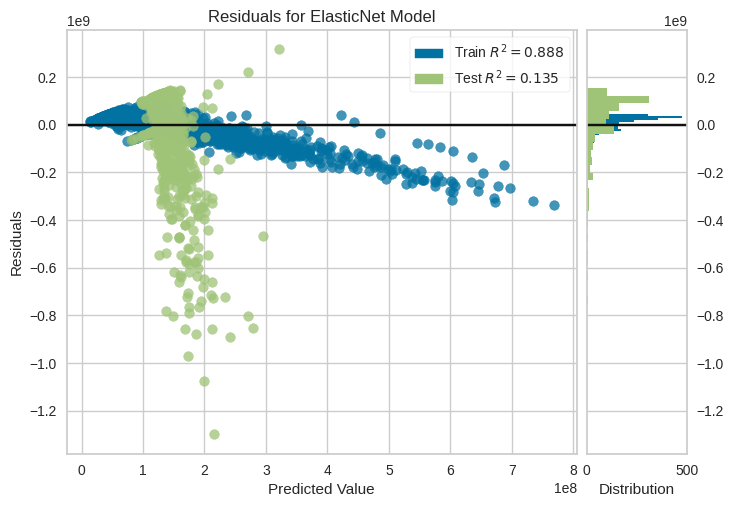

In [133]:
# Plot the tuned model's performance
plot_model(tuned_model, plot='residuals')


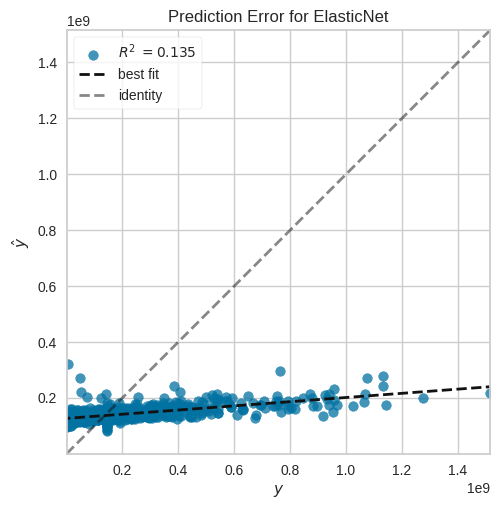

In [134]:
plot_model(tuned_model, plot='error')

In [135]:
# # Plot the tuned model's performance
# plot_model(tuned_model)

In [136]:
# plot_model(tuned_model, plot='feature')

In [137]:
# # Make predictions on the test set
# predictions = predict_model(tuned_model)

In [138]:
# Finalizing the Model:

# We finalize the model for deployment using finalize_model().

In [139]:
# Finalize the model for deployment (train on the entire dataset)
final_model = finalize_model(tuned_model)

# # Make predictions on new data using the finalized model
# predictions = predict_model(
#     final_model,  # The finalized model
#     data=df_test,  # New data on which predictions are to be made
#     round=2,  # Round the predictions to 2 decimal places
#     verbose=True  # Print detailed information about the predictions
# )

In [140]:
# Print the final model
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['movie_id', 'budget',
                                             'original_language', 'popularity',
                                             'runtime', 'status', 'release_day',
                                             'release_month', 'release_year',
                                             'Venezuela', 'Botswana', 'Kuwait',
                                             'Australia', 'Malta', 'Portugal',
                                             'Slovakia', 'Japan', 'Ireland',
                                             'Colombia', 'Belgium', 'Cyprus',
                                             'Canada', 'Luxembo...
                                                                    'keywords',
                                                                    'cast',
                                                                    'crew'],
   

In [141]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['movie_id', 'budget',
                                             'original_language', 'popularity',
                                             'runtime', 'status', 'release_day',
                                             'release_month', 'release_year',
                                             'Venezuela', 'Botswana', 'Kuwait',
                                             'Australia', 'Malta', 'Portugal',
                                             'Slovakia', 'Japan', 'Ireland',
                                             'Colombia', 'Belgium', 'Cyprus',
                                             'Canada', 'Luxembo...
                                                                    'keywords',
                                                                    'cast',
                                                                    'crew'],
                                                              handle_missing='return_nan'))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=111))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ElasticNet(alpha=4.77, l1_ratio=0.291, random_state=111))])

In [142]:
# Evaluate the model on the train set
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

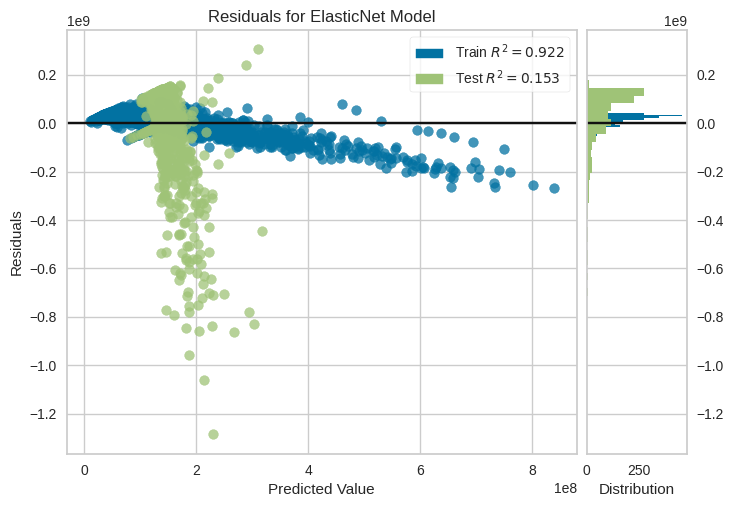

In [143]:
# Plot various evaluation metrics
plot_model(final_model)


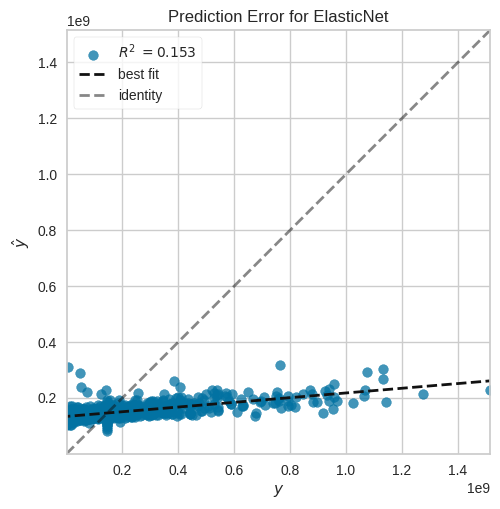

In [144]:
plot_model(final_model, plot='error')

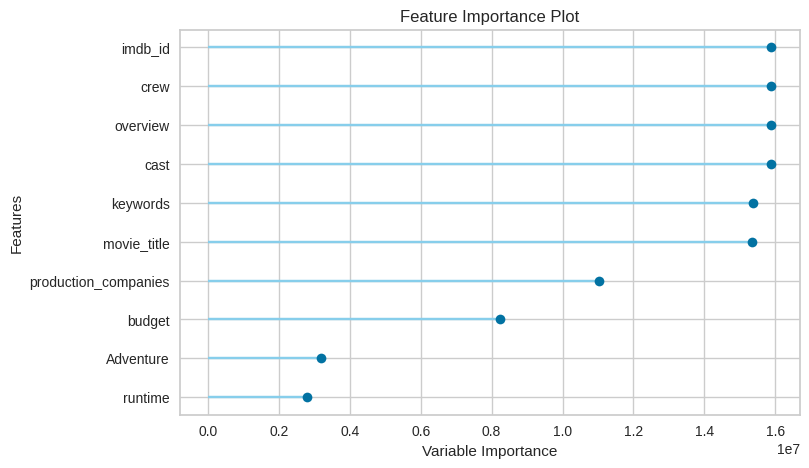

In [145]:
plot_model(final_model, plot='feature')

In [146]:
# plot_model(final_model)

In [147]:
# Plotting Budget vs. Revenue After Model Training:

# We plot budget vs. revenue again, including both actual and predicted values to see how well the model is working.

In [148]:
# # Plotting budget vs revenue after model training
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='budget', y='revenue')
# plt.title('Budget vs Revenue')
# plt.xlabel('Budget')
# plt.ylabel('Revenue')
# plt.show()



In [149]:
# Make predictions on the train set
predictions_train = predict_model(final_model)

# Extract relevant columns and round the prediction labels for train set
train_predictions = predictions_train[['movie_id', 'revenue', 'prediction_label']].copy()
train_predictions['prediction_label'] = train_predictions['prediction_label'].round(1)



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,118874944.6114,32575945387358724.0000,180488075.4714,0.1530,2.0498,78.9599


In [150]:
# Print the filtered DataFrame for train predictions
print("Train predictions:")
(train_predictions)

Train predictions:


,movie_id,revenue,prediction_label
1835,985,7000000,130726805.7
1183,7191,170764026,142269862.7
2852,798286,11500000,156568685.5
1840,338762,39861118,149826259.5
3086,1251,68673228,145370576.8
...,...,...,...
280,274870,303144152,143381035.9
3623,24420,101344412,143041717.7
1810,283235,1411927,135447083.7
2312,9942,75000000,136027272.4


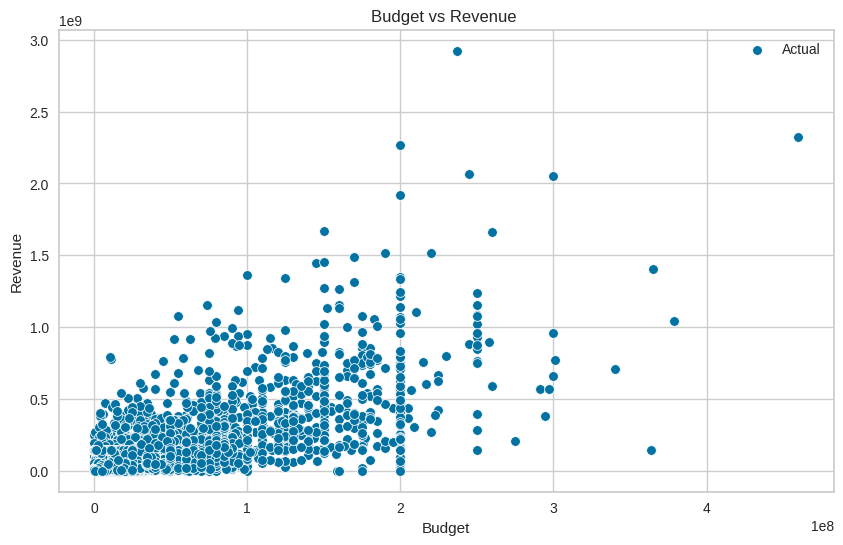

In [151]:
# Plotting budget vs revenue with predictions to see how well the model is working
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', label='Actual')
# sns.scatterplot(data=train_predictions, x=df['budget'], y='prediction_label', label='Predicted') # Change data2 to data
plt.title('Budget vs Revenue ')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [152]:
# # Extract relevant columns
# revenue_predictions = predictions[['movie_id', 'revenue', 'prediction_label']]

# # Round the prediction labels to 1 decimal place
# revenue_predictions['prediction_label'] = revenue_predictions['prediction_label'].round(1)

# # Print the filtered DataFrame
# print("Revenue predictions:")
# print(revenue_predictions)

In [153]:
# revenue_predictions

In [154]:
# test data

In [155]:
# # test data csv file

# file_path_test_data = '/content/drive/MyDrive/intern sy/infy_2024_ML/official/official submitted data sy/milestone new/3 g/test_df_normalization_131_cols.csv'

# # Load your dataset into a pandas DataFrame
# df_test = pd.read_csv(file_path_test_data)

# df_test.head(2)


In [156]:
# df_test.shape

In [157]:
# df_test.info()

In [158]:
# df_test.columns

In [159]:
df_test.shape

(1003, 168)

In [160]:
df.shape

(3973, 169)

# Q4* check for any missing columns in test data(compare with training data) and add missing columns with null values *

In [161]:
# ANS OF Q4

In [162]:
# Convert columns to lists
train_columns = df.columns.tolist()
test_columns = df_test.columns.tolist()

# Remove 'revenue' from train columns if present
if 'revenue' in train_columns:
    train_columns.remove('revenue')


# train data missing cols
# Find columns in test data that are not in train data
missing_columns_in_train = [col for col in test_columns if col not in train_columns]

missing_columns_in_train

[]

In [163]:
len(missing_columns_in_train)

0

In [164]:
# # Add missing columns to train data with None values
# for col in missing_columns_in_train:
#     df[col] = None

In [165]:
# df.shape

In [166]:
# missing cols in test data
# Find columns in train data that are not in test data
missing_columns_in_test = [col for col in train_columns if col not in test_columns]

missing_columns_in_test

[]

In [167]:
len(missing_columns_in_test)

0

In [168]:
# Add missing columns to test data with None values
for col in missing_columns_in_test:
    df_test[col] = None

In [169]:
df_test.shape

(1003, 168)

In [170]:
df.shape


(3973, 169)

In [171]:
# List of columns to be removed from the test data
cols_to_remove = [
    'Nigeria', 'Albania', 'Macao', 'Jordan', 'Namibia', 'Tunisia', 'Qatar',
    'Palestinian Territory', 'Yugoslavia', 'Unnamed: 74', 'Malti'
]

# Remove the specified columns from the test data
df_test = df_test.drop(columns=cols_to_remove, errors='ignore')

# Verify the columns are removed
df_test.columns


Index(['movie_id', 'budget', 'movie_url', 'imdb_id', 'original_language',
       'movie_title', 'overview', 'popularity', 'poster_path',
       'production_companies',
       ...
       'euskera', 'Slovenčina', 'suomi', 'தமிழ்', 'Srpski', 'Lietuvių',
       'Český', 'Eesti', 'বাংলা', 'Somali'],
      dtype='object', length=168)

In [172]:
# # Convert columns to lists
# train_columns = df.columns.tolist()
# test_columns = df_test.columns.tolist()

# # Remove 'revenue' from train columns if present
# if 'revenue' in train_columns:
#     train_columns.remove('revenue')

In [173]:
# # Find columns in train data that are not in test data
# missing_columns_in_test = [col for col in train_columns if col not in test_columns]

# missing_columns_in_test

In [174]:
df.shape
# REVENUE extra col

(3973, 169)

In [175]:
df_test.shape

(1003, 168)

In [176]:
df_test.head(2)

,movie_id,budget,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,production_companies,...,euskera,Slovenčina,suomi,தமிழ்,Srpski,Lietuvių,Český,Eesti,বাংলা,Somali
0,41210,19000000,https://www.themoviedb.org/movie/41210,tt0889573,0,The Switch,"Kassie is a smart, fun-loving single woman who...",37.077,/lQZpZHLafAfYwogCF23lnfPQmIh.jpg,"Mandate Pictures, Echo Films, Miramax, Bona Fi...",...,None,None,None,None,None,None,None,None,None,None
1,281,42000000,http://www.strange-days.com,tt0114558,0,Strange Days,Former policeman Lenny Nero has moved into a m...,28.075,/rY5BrDRcYAKE0BYmmT66YG6Uy5Q.jpg,"20th Century Fox, Lightstorm Entertainment",...,None,None,None,None,None,None,None,None,None,None


In [177]:
df.head(2)

,movie_id,budget,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,production_companies,...,Horror,Science Fiction,Family,Adventure,Documentary,Western,Mystery,War,Drama,Comedy
0,653346,160000000,https://www.20thcenturystudios.com/movies/king...,tt11389872,1,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,6245.898,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,"20th Century Studios, Oddball Entertainment, J...",...,0,1,0,1,0,0,0,0,0,0
1,929590,50000000,https://a24films.com/films/civil-war,tt17279496,1,Civil War,"In the near future, a group of war journalists...",2730.901,/sh7Rg8Er3tFcN9BpKIPOMvALgZd.jpg,"DNA Films, IPR.VC, A24",...,0,0,0,0,0,0,0,1,1,0


In [178]:
first_row_dict_test = df_test.iloc[0].to_dict()
first_row_dict_test

{'movie_id': 41210,
 'budget': 19000000,
 'movie_url': 'https://www.themoviedb.org/movie/41210',
 'imdb_id': 'tt0889573',
 'original_language': 0,
 'movie_title': 'The Switch',
 'overview': 'Kassie is a smart, fun-loving single woman who, despite her neurotic best friend Wally’s objections, decides it’s time to have a baby – even if it means doing it herself… with a little help from a charming sperm donor. But, unbeknownst to her, Kassie’s plans go awry because of a last-minute switch that isn’t discovered until seven years later… when Wally gets acquainted with Kassie’s cute, though slightly neurotic, son.',
 'popularity': 37.077,
 'poster_path': '/lQZpZHLafAfYwogCF23lnfPQmIh.jpg',
 'production_companies': 'Mandate Pictures, Echo Films, Miramax, Bona Fide Productions',
 'runtime': 101,
 'status': 1,
 'tagline': 'The most unexpected comedy ever conceived.',
 'title': 'The Switch',
 'keywords': 'new york city, pregnancy, hypochondriac, little boy, single mother, based on short story, sp

In [179]:
col = ['movie_id', 'budget']
df_test[col].head(1)

,movie_id,budget
0,41210,19000000


In [180]:
# Make predictions on the test set using the finalized model
predictions_test = predict_model(final_model, data=df_test)

In [181]:
# Evaluating Model Performance:

# We evaluate the model performance on the test data and print relevant metrics.
# We plot actual vs. predicted revenue to visually assess the model's accuracy.

In [182]:
# Model Evaluation:

# We plot residuals and error plots to visualize model performance.
# We make predictions on the test set.

In [183]:
# # Evaluate model performance on test data
# test_predictions = predict_model(final_model, data=df)

In [184]:
# Extract relevant columns and round the prediction labels for test set
test_predictions = predictions_test[['movie_id', 'prediction_label']].copy()
test_predictions['prediction_label'] = test_predictions['prediction_label'].round(1)

# Print the filtered DataFrame for test predictions
print("Test predictions:")
print(test_predictions)

Test predictions:
      movie_id  prediction_label
0        41210       127462892.0
1          281       139222880.9
2        16290       132147266.4
3        25239       120086045.0
4         2294       131865688.0
...        ...               ...
998       3594       124227893.0
999      19064       115228843.1
1000    129670       136384840.0
1001    256924       126014892.9
1002      1665       125342552.4

[1003 rows x 2 columns]


In [185]:
# Print performance metrics
print("Model Performance on Test Data:")
test_predictions

Model Performance on Test Data:


,movie_id,prediction_label
0,41210,127462892.0
1,281,139222880.9
2,16290,132147266.4
3,25239,120086045.0
4,2294,131865688.0
...,...,...
998,3594,124227893.0
999,19064,115228843.1
1000,129670,136384840.0
1001,256924,126014892.9


In [186]:
# # Plotting budget vs revenue with predictions to see how well the model is working
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='budget', y='revenue', label='Actual')
# sns.scatterplot(data2=test_predictions, x='budget', y='prediction_label', label='Predicted')
# plt.title('Budget vs Revenue (Actual vs Predicted)')
# plt.xlabel('Budget')
# plt.ylabel('Revenue')
# plt.legend()
# plt.show()

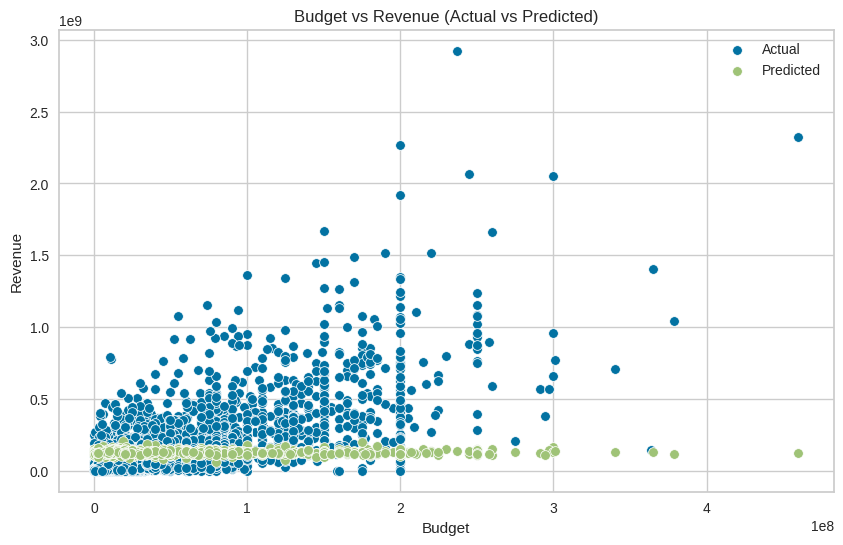

In [187]:
# Plotting budget vs revenue with predictions to see how well the model is working
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', label='Actual')
sns.scatterplot(data=test_predictions, x=df['budget'], y='prediction_label', label='Predicted') # Change data2 to data
plt.title('Budget vs Revenue (Actual vs Predicted)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [188]:
# download csv

# Q1* take  movie_id,revenue and prediction_label columns from the prediction you did for  training data and convert into csv file(if u have split the train data remove it)

In [189]:
# ANS OF Q1

# TRAIN PREDICTION DF TO CSV

# STEP 1 -
# CONVERT DF TO CSV

# Save the processed data to a CSV file
train_predictions.to_csv('train_predictions_CSV.csv', index=False)


# STEP 2 -
# DOWNLOAD LIBRARY FOR FILES
from google.colab import files

# STEP 3 -
#  DOWNLOAD CSV

#  Download the CSV file
files.download('train_predictions_CSV.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Q5* take  movie_id, prediction_label columns from the prediction you did for  test data and convert into csv file *

In [190]:
# ANS OF Q5

# TEST PREDICTION DF TO CSV

# STEP 1 -
# CONVERT DF TO CSV

# Save the processed data to a CSV file
test_predictions.to_csv('test_predictions_CSV.csv', index=False)


# STEP 2 -
# DOWNLOAD LIBRARY FOR FILES
from google.colab import files

# STEP 3 -
#  DOWNLOAD CSV

#  Download the CSV file
files.download('test_predictions_CSV.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
# SAVE MODEL

In [192]:
# Import necessary library from PyCaret and google.colab
from pycaret.regression import save_model
from google.colab import files

# Save the final model
save_model(final_model, 'final_model')

# Download the saved model file
files.download('final_model.pkl')

Transformation Pipeline and Model Successfully Saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
# Q6* upload these two csv files to google drive before monday evening and to github - ipynb file
# ans = done = uploaded

In [194]:
df_test.head(1)

,movie_id,budget,movie_url,imdb_id,original_language,movie_title,overview,popularity,poster_path,production_companies,...,euskera,Slovenčina,suomi,தமிழ்,Srpski,Lietuvių,Český,Eesti,বাংলা,Somali
0,41210,19000000,https://www.themoviedb.org/movie/41210,tt0889573,0,The Switch,"Kassie is a smart, fun-loving single woman who...",37.077,/lQZpZHLafAfYwogCF23lnfPQmIh.jpg,"Mandate Pictures, Echo Films, Miramax, Bona Fi...",...,None,None,None,None,None,None,None,None,None,None


In [195]:
# # If a class has only one instance, consider removing it or collecting more data
# # For demonstration, let's remove rows where 'revenue' is a value that occurs only once
# rare_values = df['revenue'].value_counts()[df['revenue'].value_counts() == 1].index
# df = df[~df['revenue'].isin(rare_values)]

In [196]:
# # Check the distribution of your target variable
# print(df['revenue'].value_counts())

In [197]:

# # Setup the PyCaret environment
# reg = setup(
#     data=df,
#     target= 'revenue',
#     train_size=0.8,
#     normalize=True,
#     numeric_imputation='mean',
#     ignore_features=['id', 'homepage', 'imdb_id', 'movie_title', 'overview', 'poster_path', 'tagline', 'title', 'keywords', 'cast', 'crew'],
#     session_id= 111
# )

# print(reg)

In [198]:
# # Setup the PyCaret environment with various parameters for preprocessing and feature engineering
# reg = setup(
#     data=df,  # The dataset you are working with
#     target= 'revenue',  # The target column name (the column you want to predict)
#     train_size=0.8,  # Proportion of the dataset to be used for training (80% here)
#     normalize=True,  # Normalize the data (scale features to have mean 0 and variance 1)
#     # transformation=True,  # Apply power transformations to make data more Gaussian-like
#     # feature_selection=True,  # Enable feature selection
#     # remove_multicollinearity=True,  # Remove features that are highly correlated with each other
#     # outliers_threshold=0.05,  # Threshold for defining outliers (5% here)
#     numeric_imputation='mean',  # Impute missing values in numeric features with the mean
#     # categorical_imputation='mode',  # Impute missing values in categorical features with the mode
#     ignore_features=['id', 'homepage', 'imdb_id', 'movie_title', 'overview', 'poster_path', 'tagline', 'title', 'keywords', 'cast', 'crew'],  # Ignore these features during modeling
#     session_id= 111  # Seed for reproducibility
# )

# # Print the setup configuration to check if everything is set correctly
# print(reg)


In [199]:
# # Compare different models based on specified criteria
# best_model = compare_models(
#     sort='Accuracy',  # Sort models by accuracy
#     n_select=3,  # Select the top 3 models
#     fold=5,  # Use 5-fold cross-validation
#     round=2,  # Round the metrics to 2 decimal places
#     cross_validation=True  # Enable cross-validation
# )


In [200]:
# # Create a specific model (Random Forest in this case) with specified hyperparameters
# model = create_model(
#     'rf',  # Random Forest model
#     n_estimators=100,  # Number of trees in the forest
#     max_depth=10,  # Maximum depth of each tree
#     min_samples_split=5,  # Minimum number of samples required to split an internal node
#     min_samples_leaf=2  # Minimum number of samples required to be at a leaf node
# )

# # Tune the created model to find the best hyperparameters
# tuned_model = tune_model(
#     model,  # The model to be tuned
#     n_iter=50,  # Number of iterations for tuning
#     optimize='Accuracy',  # Metric to optimize (accuracy)
#     choose_better=True,  # Choose the better performing model
#     search_library='scikit-learn',  # Library to use for hyperparameter search
#     search_algorithm='random',  # Algorithm to use for hyperparameter search (random search)
#     early_stopping=True,  # Enable early stopping to prevent overfitting
#     fold=5,  # Use 5-fold cross-validation
#     round=2  # Round the metrics to 2 decimal places
# )


In [201]:
# # Finalize the model for deployment (train on the entire dataset)
# final_model = finalize_model(tuned_model)

# # Make predictions on new data using the finalized model
# predictions = predict_model(
#     final_model,  # The finalized model
#     data=new_data,  # New data on which predictions are to be made
#     round=2,  # Round the predictions to 2 decimal places
#     verbose=True  # Print detailed information about the predictions
# )